# Proyek Analisis Data: [Bike Sharing Datset]
- **Nama:** [Muhammad Hafizhuda]
- **Email:** [mhafizhuda03@gmail.com/mc012d5y2163@student.devacademy.id]
- **ID Dicoding:** [MC012D5Y2163]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Bagaimana pola peminjaman sepeda berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [15]:
hour_df = pd.read_csv("hour.csv")

**Insight:**
- Data set ini terdiri dari hour.csv (jam) yang dimana digunkan untuk mencatat jumlah peminjaman sepeda berdasarkan faktor cuaca, musim , hari, dan lainnya.

### Assessing Data

In [16]:
print(hour_df.info())
print(hour_df.describe())
print(hour_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
          instant        season            y

**Insight:**
- Beberapa kolom memiliki tipe data yang kurang sesuai dan berniali null pada kolom tertentu, tidak sesuai seperti tanggal dalam format string yang perlu diubah ke datetime.

### Cleaning Data

In [17]:
print(df_day.isnull().sum())
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
print(df_day.duplicated().sum())
df_day.drop_duplicates(inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
0


**Insight:**
-Tidak ada missing values yang perlu ditangani.

## Exploratory Data Analysis (EDA)

### Explore ...

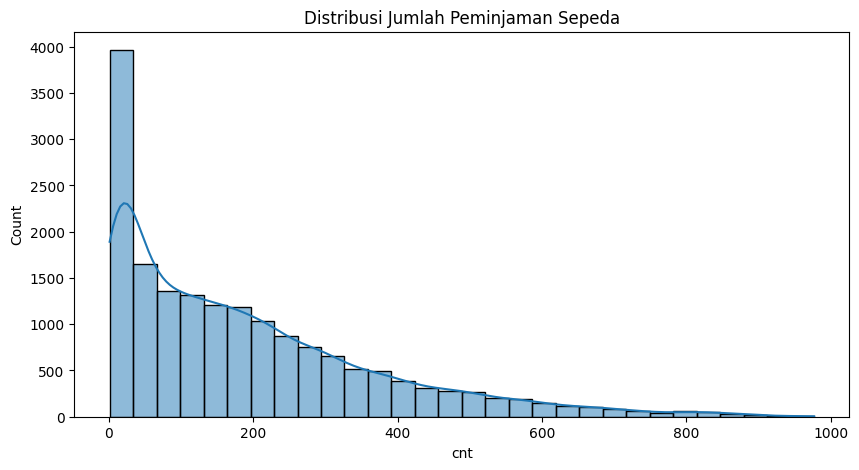

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda')
plt.show()

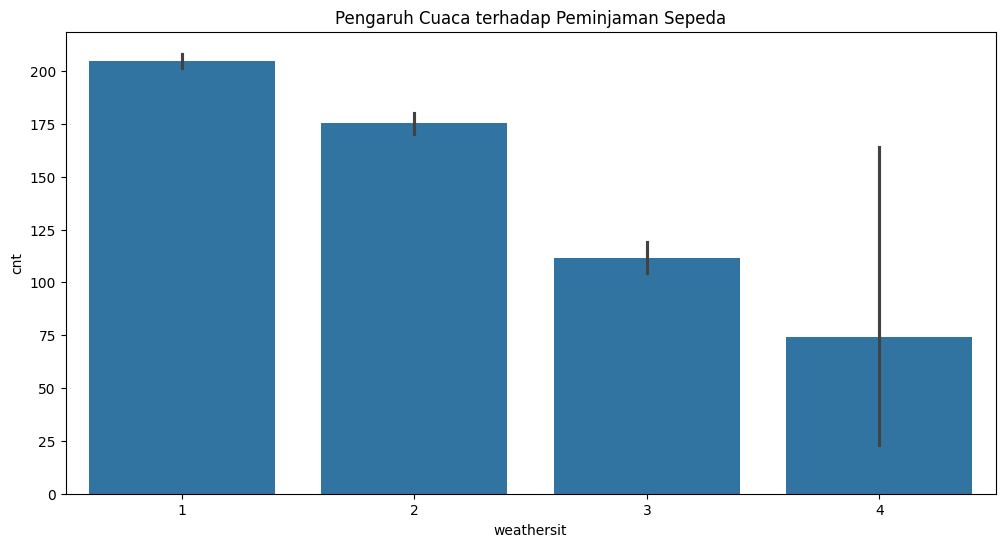

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x='weathersit', y='cnt', data=hour_df)
plt.title('Pengaruh Cuaca terhadap Peminjaman Sepeda')
plt.show()


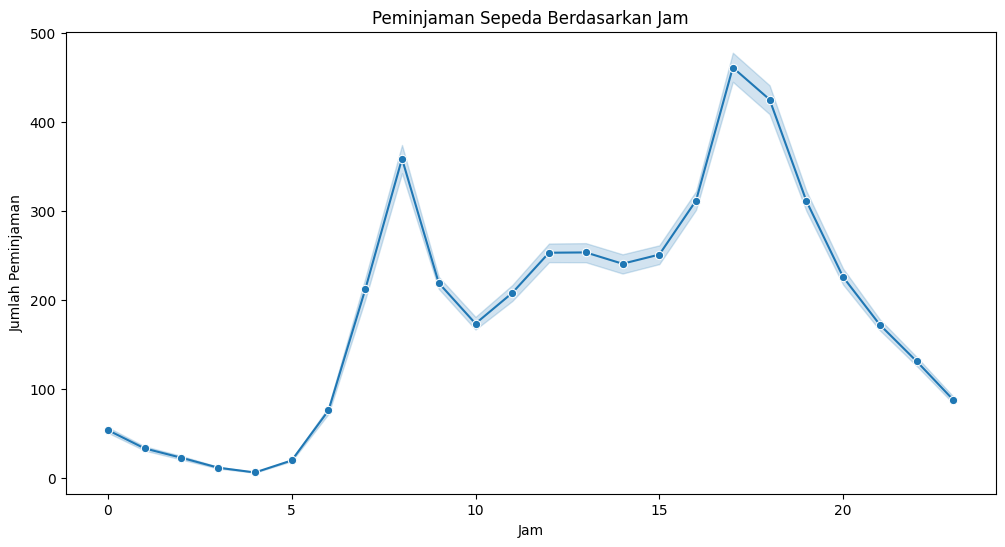

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(x='hr', y='cnt', data=hour_df, marker='o')
plt.title('Peminjaman Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

In [22]:
df_grouped_weather = df_day.groupby('weathersit')['cnt'].agg(['mean', 'sum', 'count'])
print("\nAgregasi berdasarkan kondisi cuaca:")
print(df_grouped_weather)

df_grouped_weekday = df_day.groupby('weekday')['cnt'].agg(['mean', 'sum'])
print("\nAgregasi berdasarkan hari dalam seminggu:")
print(df_grouped_weekday)



Agregasi berdasarkan kondisi cuaca:
                   mean      sum  count
weathersit                             
1           4876.786177  2257952    463
2           4035.862348   996858    247
3           1803.285714    37869     21

Agregasi berdasarkan hari dalam seminggu:
                mean     sum
weekday                     
0        4228.828571  444027
1        4338.123810  455503
2        4510.663462  469109
3        4548.538462  473048
4        4667.259615  485395
5        4690.288462  487790
6        4550.542857  477807


**Insight:**
- Jumlah peminjaman sepeda lebih tinggi saat cuaca cerah dibandingkan hujan.
- Peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

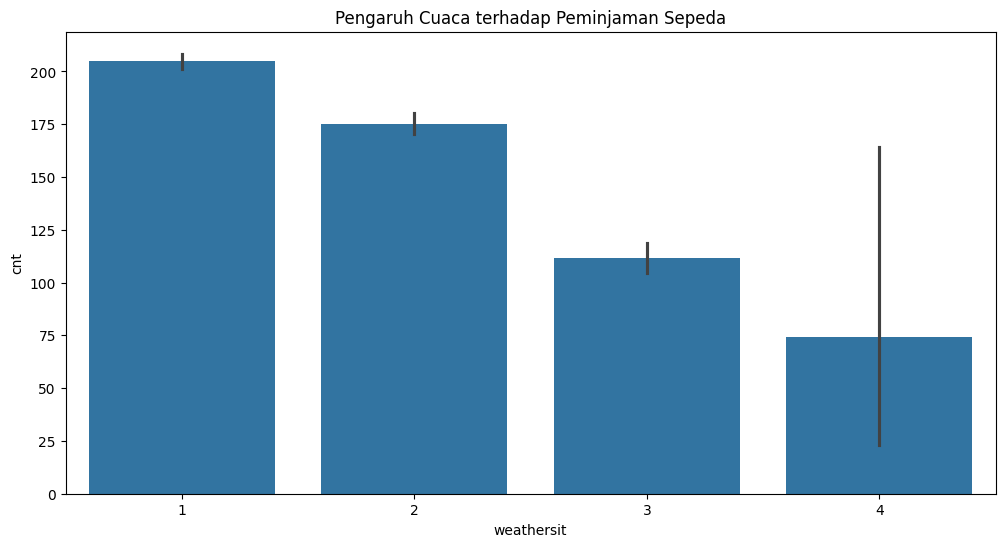

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='weathersit', y='cnt', data=df_hour)
plt.title('Pengaruh Cuaca terhadap Peminjaman Sepeda')
plt.show()

- Dari grafik, terlihat bahwa peminjaman sepeda cenderung lebih tinggi ketika cuaca cerah atau berawan dibandingkan saat hujan atau badai.
- Hal ini dapat dijelaskan karena pengguna cenderung lebih nyaman bersepeda saat kondisi cuaca mendukung. Hujan atau badai bisa menghambat aktivitas luar ruangan, menyebabkan penurunan signifikan dalam jumlah peminjaman.
- Strategi bisnis yang bisa diterapkan adalah menyediakan fasilitas tambahan seperti jas hujan atau shelter untuk sepeda guna meningkatkan kenyamanan pengguna saat cuaca buruk.

### Pertanyaan 2:

<ipython-input-25-0bb5a949c976>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=df_hour, ci=None)


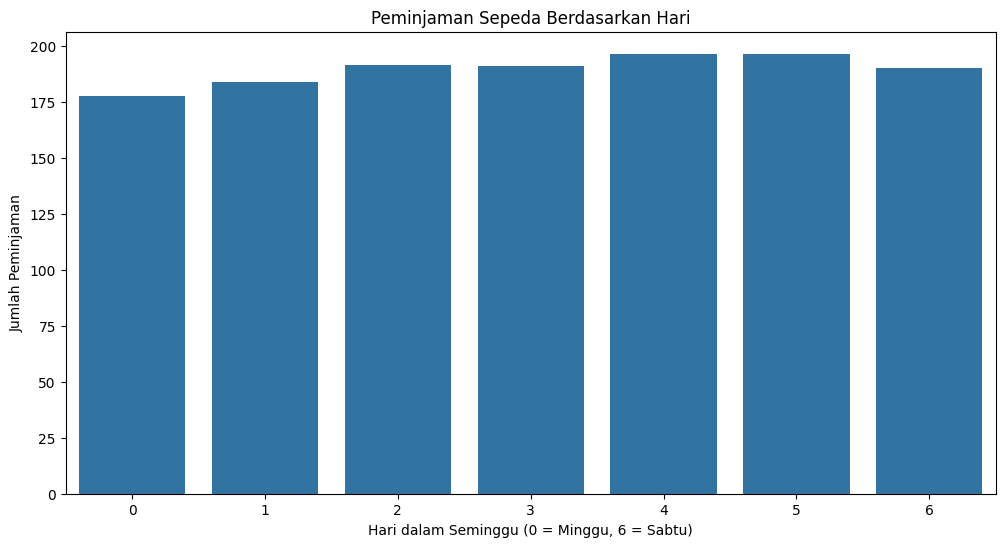

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='weekday', y='cnt', data=df_hour, ci=None)
plt.title('Peminjaman Sepeda Berdasarkan Hari')
plt.xlabel('Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)')
plt.ylabel('Jumlah Peminjaman')
plt.show()

**Insight:**
- Dari grafik, terlihat bahwa jumlah peminjaman lebih tinggi pada hari kerja dibandingkan akhir pekan.
Hal ini menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai alat transportasi utama untuk bekerja atau sekolah.
- Pada akhir pekan, jumlah peminjaman cenderung sedikit lebih rendah, yang kemungkinan besar karena pengguna kasual lebih banyak menggunakan sepeda untuk rekreasi dibandingkan keperluan rutin.
- Dengan informasi ini, operator penyewaan sepeda dapat menyesuaikan jumlah unit sepeda yang tersedia, menambah armada pada jam sibuk di hari kerja, dan meningkatkan promosi di akhir pekan untuk menarik lebih banyak pengguna rekreasi..

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Cuaca cerah meningkatkan jumlah peminjaman sepeda secara signifikan.
- Conclution pertanyaan 2: Peminjaman meningkat pada jam sibuk pagi dan sore, terutama pada hari kerja.